In [1]:
# Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats

pd.set_option('display.max_columns', 100)
sns.set(style='whitegrid', palette='muted', color_codes=True)

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [2]:
# Load Dataset

file_path = "Philadelphia and Pittsburgh_processed.csv"
df = pd.read_csv(file_path)

print("✅ Dataset Loaded Successfully!")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.head()




✅ Dataset Loaded Successfully!
Rows: 1203, Columns: 111


,unique_buyer_id,searched_location,name,address,first_name,last_name,type,score,bnh_score,officer_data_1_name,linked_customers,buyer_office_address,buyer_office_1_name,buyer_office_2_name,buyer_office_3_name,buyer_office_4_name,buyer_office_5_name,buyer_office_6_name,buyer_office_7_name,buyer_office_8_name,buyer_office_9_name,buyer_office_10_name,phone_mobile_1,phone_mobile_2,phone_mobile_3,phone_mobile_4,phone_mobile_5,phone_mobile_6,phone_mobile_7,phone_mobile_8,phone_mobile_9,phone_mobile_10,phone_residential_1,phone_residential_2,phone_residential_3,phone_residential_4,phone_residential_5,phone_residential_6,phone_residential_7,phone_residential_8,phone_residential_9,phone_residential_10,phone_other_1,phone_other_2,phone_other_3,phone_other_4,phone_other_5,phone_other_6,phone_other_7,phone_other_8,...,buyer_office_10_address,buyer_office_1_email,buyer_office_2_email,buyer_office_3_email,buyer_office_4_email,buyer_office_5_email,buyer_office_6_email,buyer_office_7_email,buyer_office_8_email,buyer_office_9_email,buyer_office_10_email,officer_1_name,officer_1_address,officer_1_phone,officer_1_email,officer_2_name,officer_2_address,officer_2_phone,officer_2_email,officer_3_name,officer_3_address,officer_3_phone,officer_3_email,officer_4_name,officer_4_address,officer_4_phone,officer_4_email,officer_5_name,officer_5_address,officer_5_phone,officer_5_email,phone_number_1,phone_number_2,phone_number_3,phone_number_4,phone_number_5,phone_number_6,phone_number_7,phone_number_8,phone_number_9,phone_number_10,phone_number_all,email_1,email_2,email_3,email_4,email_5,email_all,timestamp_of_import,timestamp_of_last_update
0,1000511,"Philadelphia, PA 19150, USA",Peter Korneychuk (PA),NaN,Peter,Korneychuk,individual,5000,0,NaN,NaN,"[{'id': 1227069, 'full': '830 SOUTH ST, PHILAD...",PETER KORNEYCHUK,Peter Korneychuk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.154164e+09,2.679399e+09,2.155545e+09,6.104533e+09,NaN,NaN,NaN,NaN,NaN,NaN,6.105869e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ELINA.KORNEYCHUK@GMAIL.COM,LIGHTDEER@YAHOO.COM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023111212,2154164216,2155545130,2679398708,6.103409e+09,6.104204e+09,6.104533e+09,6.105869e+09,6106805395,6.109086e+09,"2023111212, 2154164216, 2155545130, 2679398708...",ELINA.KORNEYCHUK@GMAIL.COM,LIGHTDEER@YAHOO.COM,NaN,NaN,NaN,"ELINA.KORNEYCHUK@GMAIL.COM, LIGHTDEER@YAHOO.COM",2025-10-30T06:20:18.458609,2025-10-30T06:20:18.459253
1,1001654,"Philadelphia, PA 19108, USA",PHILADELPHIA REVITALIZ (PA),NaN,PHILADELPHIA,REVITALIZ,individual,6000,0,NaN,NaN,"[{'id': 1228320, 'full': '4345 COUNTY LINE RD,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023111212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023111212,NaN,NaN,NaN,NaN,NaN,NaN,2025-10-30T06:20:18.458609,2025-10-30T06:20:18.459253
2,1002482,"Philadelphia, PA 19146, USA",PHILIP TAPPENDEN (PA),NaN,PHILIP,TAPPENDEN,individual,11000,6000,NaN,NaN,"[{'id': 1229210, 'full': '150 LOCKSLEY, GLEN M...",PHILIP TAPPENDEN,PHILLIP TAPPENDEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.106378e+09,9.546392e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.103586e+09,6.103993e+09,6.103991e+09,4.843159e+09,NaN,NaN,NaN,NaN,NaN,NaN,4.843159e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,TAPCOENTERPRISE@YAHOO.COM,JTAPPENDEN@HOTMAIL.COM,PHILLIP.TAPPENDEN0410@GMAIL.COM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023111212,2153275705,2537778649,2676143744,4.358687e+09,4.843159e+09,4.844102e+09,4.844779e+09,4847869398,4.848325e+09,"2023111212, 2153275705, 2537778649, 2676143744...",JTAPPENDEN@HOTMAIL.COM,PHILLIP.TAPPENDEN0410@GMAIL.COM,TAPCOENTERPRISE@YAHOO.COM,NaN,NaN,"JTAPPENDEN@HOTMAIL.

In [3]:
# Data Exploration

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Columns: 111 entries, unique_buyer_id to timestamp_of_last_update
dtypes: float64(50), int64(3), object(58)
memory usage: 1.0+ MB


In [4]:
df.isnull().sum()


unique_buyer_id                0
searched_location              0
name                           0
address                     1185
first_name                  1020
                            ... 
email_4                      592
email_5                      713
email_all                    340
timestamp_of_import            0
timestamp_of_last_update       0
Length: 111, dtype: int64

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
unique_buyer_id,1203.0,NaN,NaN,NaN,13854983.243558,52413678.149051,3024.0,148857.5,376773.0,837261.5,310137217.0
searched_location,1203,76,"Philadelphia, PA 19147, USA",58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,1203,1203,Pedro Rosario (NJ),1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
address,18,18,"116 RAYMOND DR, SEWELL (NJ) 08080-1616 (856) 2...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_name,183,153,Thomas,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
email_4,611,593,MPRUEITT1@MSN.COM,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
email_5,490,476,MPRUEITT@MSN.COM,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
email_all,863,839,"BSKAOST@GMAIL.COM, YUDIALON18@GMAIL.COM",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timestamp_of_import,1203,1,2025-10-30T06:20:18.458609,1203,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#  Missing Values & Data Types

missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]

print(f"Total columns with missing values: {len(missing)}")
missing.head(20)




Total columns with missing values: 103


officer_3_address    1203
officer_3_phone      1203
officer_3_email      1203
officer_4_phone      1203
officer_4_address    1203
officer_5_address    1203
officer_1_phone      1203
officer_1_email      1203
officer_2_address    1203
officer_1_address    1203
officer_2_phone      1203
phone_other_10       1203
phone_other_9        1203
phone_other_8        1203
phone_other_7        1203
officer_2_email      1203
officer_5_email      1203
officer_5_phone      1203
officer_4_email      1203
phone_other_6        1199
dtype: int64

In [7]:

# Feature Engineering

# Extract date
if 'timestamp_of_import' in df.columns:
    df['timestamp_of_import'] = pd.to_datetime(df['timestamp_of_import'], errors='coerce')
    df['import_year'] = df['timestamp_of_import'].dt.year
    df['import_month'] = df['timestamp_of_import'].dt.month
    df['import_day'] = df['timestamp_of_import'].dt.day

# name length 
if 'name' in df.columns:
    df['name_length'] = df['name'].astype(str).apply(len)

# Binary flag
if 'email_1' in df.columns:
    df['has_email'] = df['email_1'].notnull().astype(int)

print("✅ Feature Engineering complete!")
df.head(3)




✅ Feature Engineering complete!


,unique_buyer_id,searched_location,name,address,first_name,last_name,type,score,bnh_score,officer_data_1_name,linked_customers,buyer_office_address,buyer_office_1_name,buyer_office_2_name,buyer_office_3_name,buyer_office_4_name,buyer_office_5_name,buyer_office_6_name,buyer_office_7_name,buyer_office_8_name,buyer_office_9_name,buyer_office_10_name,phone_mobile_1,phone_mobile_2,phone_mobile_3,phone_mobile_4,phone_mobile_5,phone_mobile_6,phone_mobile_7,phone_mobile_8,phone_mobile_9,phone_mobile_10,phone_residential_1,phone_residential_2,phone_residential_3,phone_residential_4,phone_residential_5,phone_residential_6,phone_residential_7,phone_residential_8,phone_residential_9,phone_residential_10,phone_other_1,phone_other_2,phone_other_3,phone_other_4,phone_other_5,phone_other_6,phone_other_7,phone_other_8,...,buyer_office_5_email,buyer_office_6_email,buyer_office_7_email,buyer_office_8_email,buyer_office_9_email,buyer_office_10_email,officer_1_name,officer_1_address,officer_1_phone,officer_1_email,officer_2_name,officer_2_address,officer_2_phone,officer_2_email,officer_3_name,officer_3_address,officer_3_phone,officer_3_email,officer_4_name,officer_4_address,officer_4_phone,officer_4_email,officer_5_name,officer_5_address,officer_5_phone,officer_5_email,phone_number_1,phone_number_2,phone_number_3,phone_number_4,phone_number_5,phone_number_6,phone_number_7,phone_number_8,phone_number_9,phone_number_10,phone_number_all,email_1,email_2,email_3,email_4,email_5,email_all,timestamp_of_import,timestamp_of_last_update,import_year,import_month,import_day,name_length,has_email
0,1000511,"Philadelphia, PA 19150, USA",Peter Korneychuk (PA),NaN,Peter,Korneychuk,individual,5000,0,NaN,NaN,"[{'id': 1227069, 'full': '830 SOUTH ST, PHILAD...",PETER KORNEYCHUK,Peter Korneychuk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.154164e+09,2.679399e+09,2.155545e+09,6.104533e+09,NaN,NaN,NaN,NaN,NaN,NaN,6.105869e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023111212,2154164216,2155545130,2679398708,6.103409e+09,6.104204e+09,6.104533e+09,6.105869e+09,6106805395,6.109086e+09,"2023111212, 2154164216, 2155545130, 2679398708...",ELINA.KORNEYCHUK@GMAIL.COM,LIGHTDEER@YAHOO.COM,NaN,NaN,NaN,"ELINA.KORNEYCHUK@GMAIL.COM, LIGHTDEER@YAHOO.COM",2025-10-30 06:20:18.458609,2025-10-30T06:20:18.459253,2025,10,30,21,1
1,1001654,"Philadelphia, PA 19108, USA",PHILADELPHIA REVITALIZ (PA),NaN,PHILADELPHIA,REVITALIZ,individual,6000,0,NaN,NaN,"[{'id': 1228320, 'full': '4345 COUNTY LINE RD,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023111212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023111212,NaN,NaN,NaN,NaN,NaN,NaN,2025-10-30 06:20:18.458609,2025-10-30T06:20:18.459253,2025,10,30,27,0
2,1002482,"Philadelphia, PA 19146, USA",PHILIP TAPPENDEN (PA),NaN,PHILIP,TAPPENDEN,individual,11000,6000,NaN,NaN,"[{'id': 1229210, 'full': '150 LOCKSLEY, GLEN M...",PHILIP TAPPENDEN,PHILLIP TAPPENDEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.106378e+09,9.546392e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.103586e+09,6.103993e+09,6.103991e+09,4.843159e+09,NaN,NaN,NaN,NaN,NaN,NaN,4.843159e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023111212,2153275705,2537778649,2676143744,4.358687e+09,4.843159e+09,4.844102e+09,4.844779e+09,4847869398,4.848325e+09,"2023111212, 2153275705, 2537778649, 2676143744...",JTAPPENDEN@HOTMAIL.COM,PHILLIP.TAPPENDEN0410@GMAIL.COM,TAPCOENTERPRISE@YAHOO.COM,NaN,NaN,"JTAPPENDEN@HOTMAIL.COM, PHILLIP.TAPPENDEN0410@...",2025-10-30 06:20:18.458609,2025-10-30T06:20:18.459253,2025,10,30,21,1


c:\Users\aliza\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


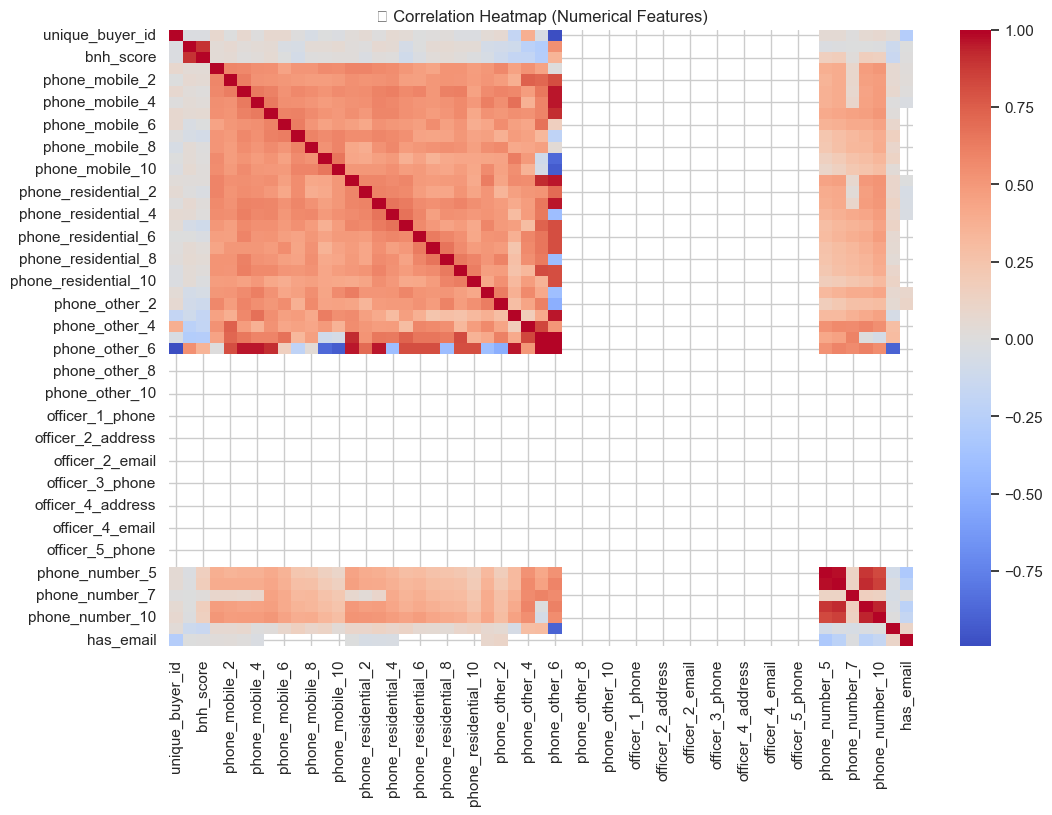

In [8]:

# Feature Selection (Correlation)

num_df = df.select_dtypes(include=['int64', 'float64'])

corr = num_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("🔗 Correlation Heatmap (Numerical Features)")
plt.show()

In [9]:

#  Feature Encoding

cat_cols = df.select_dtypes(include=['object']).columns[:5]
le = LabelEncoder()

for col in cat_cols:
    try:
        df[col + '_encoded'] = le.fit_transform(df[col].astype(str))
    except:
        pass

df[[col + '_encoded' for col in cat_cols]].head()




,searched_location_encoded,name_encoded,address_encoded,first_name_encoded,last_name_encoded
0,48,907,18,109,75
1,9,862,18,106,121
2,44,863,18,107,154
3,1,443,18,153,171
4,14,916,18,111,0


Summary Statistics:


,count,mean,min,25%,50%,75%,max,std,skew,kurtosis
unique_buyer_id,1203.0,13854983.243558,3024.0,148857.5,376773.0,837261.5,310137217.0,52413678.149051,4.282728,18.029993
score,1203.0,367177.888612,1000.0,5000.0,7000.0,13500.0,65896000.0,4644909.912272,14.038803,195.709569
bnh_score,1203.0,55039.068994,0.0,0.0,2000.0,7000.0,6334000.0,503348.930392,11.368510,131.647125
phone_mobile_1,936.0,4977962533.893163,2012077014.0,2672786841.5,4846671240.0,7176948972.0,9739198974.0,2493879518.77164,0.275996,-1.412420
phone_mobile_2,836.0,5015826066.035885,2012476414.0,2672862749.25,4848324124.5,7183418286.5,9739977013.0,2502068617.854373,0.276844,-1.399586
phone_mobile_3,704.0,5012549665.132102,2012123000.0,2672755869.0,4845412331.0,7254912325.0,9739970138.0,2562071543.130538,0.303869,-1.426368
phone_mobile_4,597.0,4892735632.259631,2012146823.0,2672425151.0,4255016173.0,7182493330.0,9735832309.0,2513967186.217766,0.346223,-1.410347
phone_mobile_5,479.0,4757018479.181628,2012347218.0,2672657837.0,4104911959.0,7173548506.5,9739314045.0,2472273608.138034,0.486467,-1.288375
phone_mobile_6,402.0,4812703312.38806,2012347135.0,2673263907.75,4124557612.5,7150656087.25,9737134657.0,2465776878.71654,0.429176,-1.346632
phone_mobile_7,336.0,4776466273.211309,2014525832.0,2673001943.75,4091704884.0,6644395813.25,9739917910.0,2470025148.364908,0.455809,-1.305130


c:\Users\aliza\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


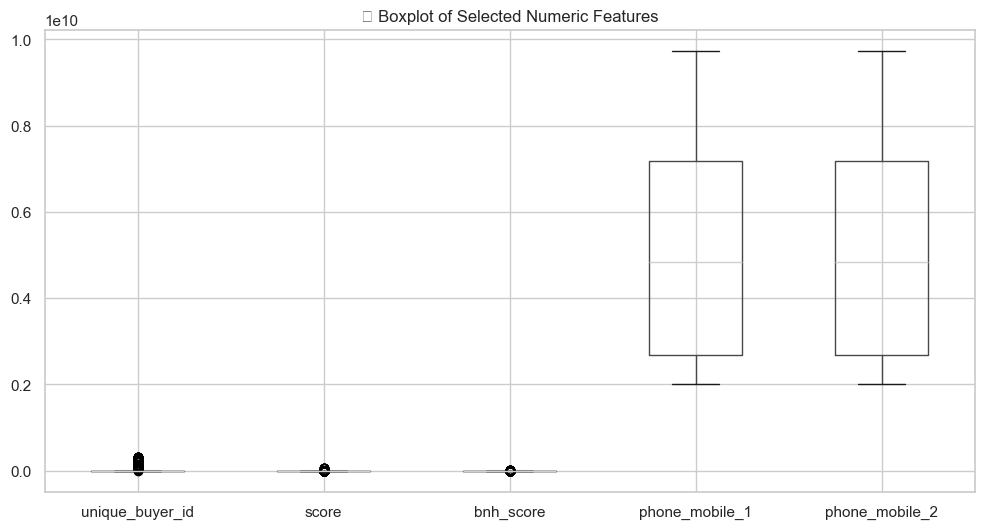

In [10]:

#  Summary Statistics & Outlier Detection

num_summary = df.describe().T
num_summary['skew'] = df.skew(numeric_only=True)
num_summary['kurtosis'] = df.kurt(numeric_only=True)
print("Summary Statistics:")
display(num_summary.head(10))

# Boxplot 
cols_to_plot = num_df.columns[:5]
plt.figure(figsize=(12, 6))
df[cols_to_plot].boxplot()
plt.title("📦 Boxplot of Selected Numeric Features")
plt.show()




In [11]:

#  Correlation Analysis

corr_pairs = corr.unstack().sort_values(ascending=False)
high_corr = corr_pairs[(corr_pairs < 1) & (corr_pairs > 0.6)].drop_duplicates()
display(high_corr.head(10))


phone_other_5        phone_other_6     0.999997
phone_number_6       phone_number_5    0.972439
phone_residential_1  phone_other_6     0.959584
phone_residential_3  phone_other_6     0.959408
phone_mobile_3       phone_other_6     0.954128
phone_other_6        phone_other_3     0.954027
                     phone_mobile_4    0.954024
phone_number_10      phone_number_8    0.936005
phone_number_6       phone_number_8    0.921727
phone_residential_1  phone_other_5     0.919717
dtype: float64

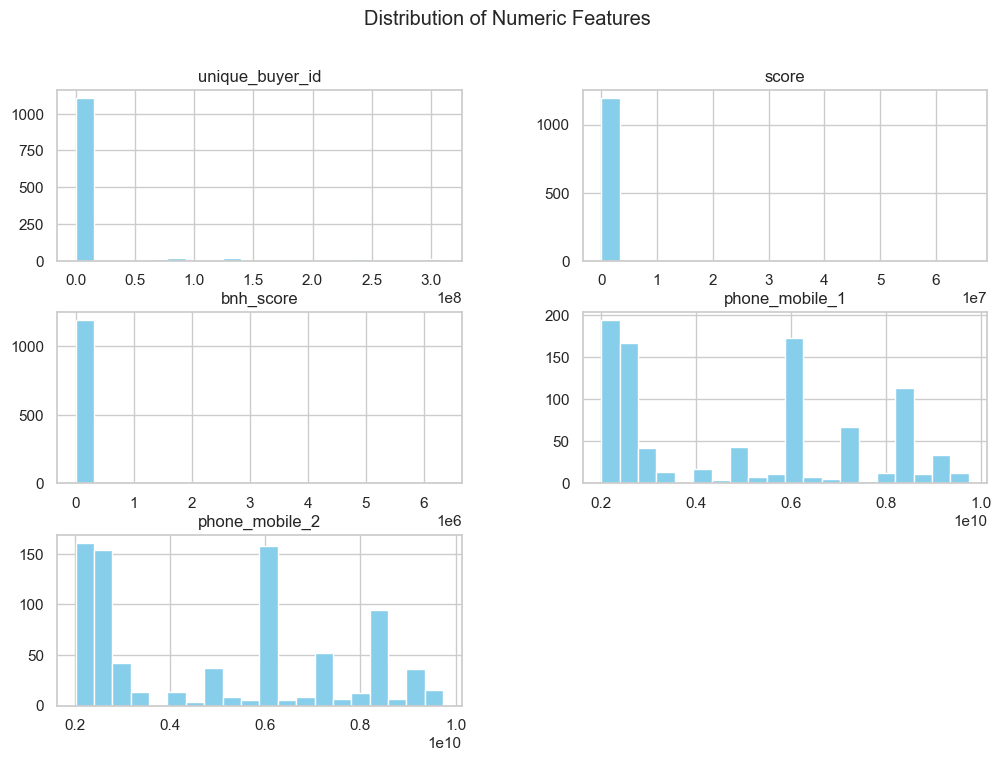

In [12]:

#  Data Visualization
# Histograms

num_cols = num_df.columns[:5]
df[num_cols].hist(figsize=(12, 8), bins=20, color='skyblue')
plt.suptitle("Distribution of Numeric Features")
plt.show()



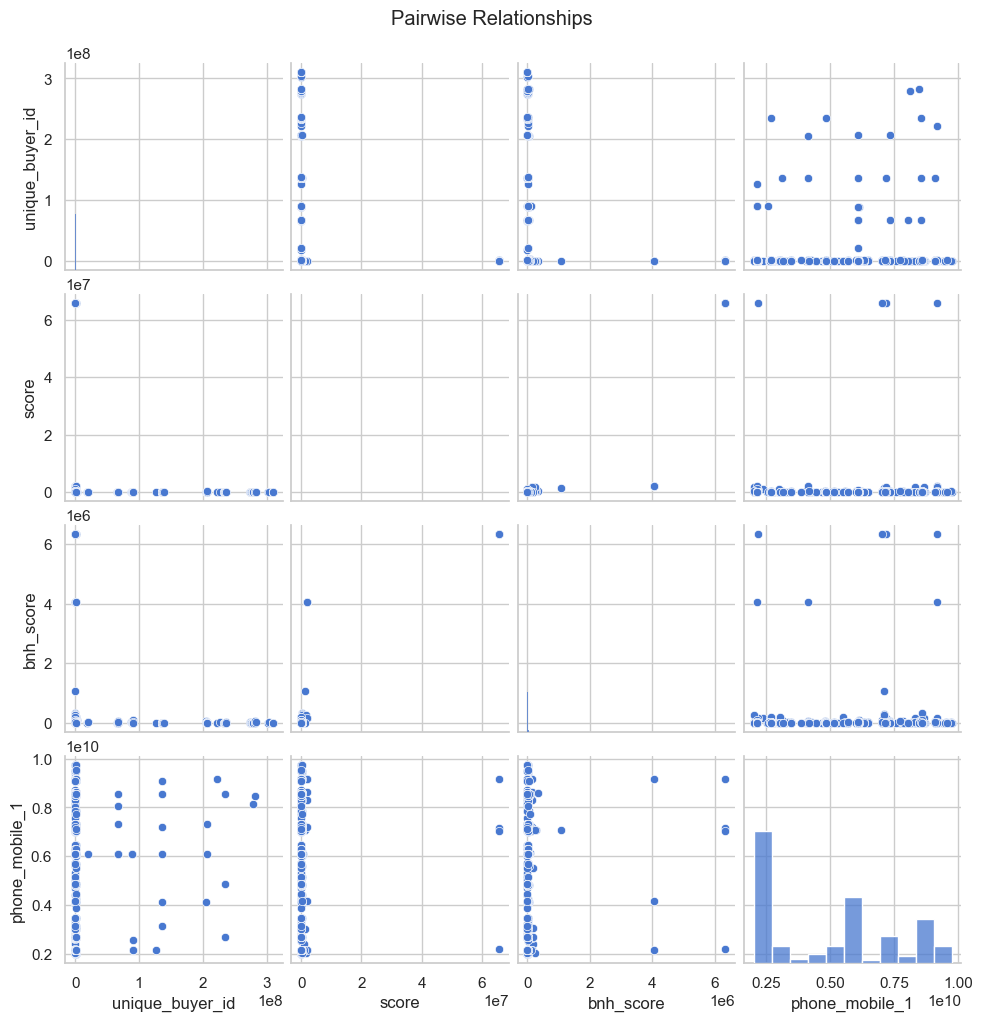

In [13]:
# Pairwise Relationships
sns.pairplot(df[num_df.columns[:4]])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()



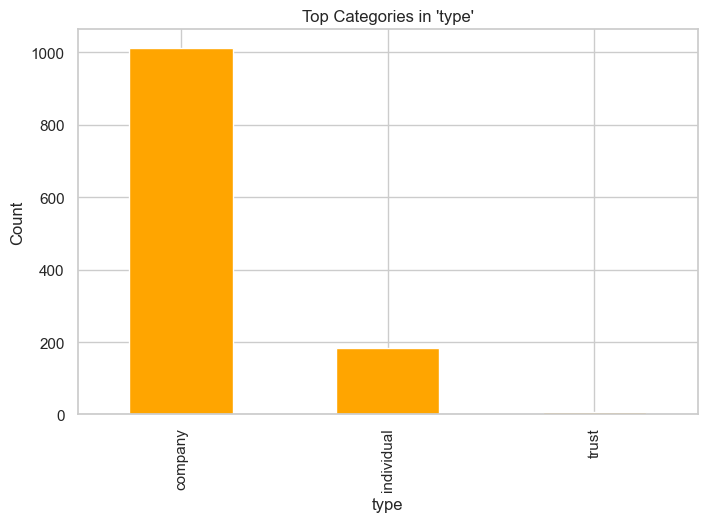

In [14]:
# Bar Chart 
cat_col = 'type' if 'type' in df.columns else cat_cols[0]
plt.figure(figsize=(8, 5))
df[cat_col].value_counts().nlargest(10).plot(kind='bar', color='orange')
plt.title(f"Top Categories in '{cat_col}'")
plt.xlabel(cat_col)
plt.ylabel("Count")
plt.show()




In [15]:

#  Save Processed Dataset

df.to_csv("Philadelphia_and_Pittsburgh_cleaned.csv", index=False)
print("✅ Cleaned dataset saved as 'Philadelphia_and_Pittsburgh_cleaned.csv'")


✅ Cleaned dataset saved as 'Philadelphia_and_Pittsburgh_cleaned.csv'


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import warnings
import pickle
import os
warnings.filterwarnings('ignore')

print("="*80)
print("🤖 COMPLETE LEAD SCORING & PREDICTION SYSTEM")
print("="*80)

# ============================================================================
# PHASE 1: TRAIN MODEL ON EXISTING DATA
# ============================================================================

print("\n" + "="*80)
print("📚 PHASE 1: TRAINING MODEL")
print("="*80)

# Load training data
training_csv = r"C:\Users\aliza\Desktop\DSF Project\DSF Project\Philadelphia_and_Pittsburgh_cleaned.csv"
df_train = pd.read_csv(training_csv)

print(f"\n📁 Loaded training data: {df_train.shape[0]} rows × {df_train.shape[1]} columns")

# Target variable
target_col = "score"
y_train_full = df_train[target_col].copy()

print(f"\n🎯 Target Variable Analysis (score):")
print(f"  Mean: {y_train_full.mean():,.2f}")
print(f"  Median: {y_train_full.median():,.2f}")
print(f"  Std: {y_train_full.std():,.2f}")
print(f"  Min: {y_train_full.min():,.2f}")
print(f"  Max: {y_train_full.max():,.2f}")

# Store threshold for lead classification (using median)
SCORE_THRESHOLD = y_train_full.median()
print(f"\n📊 Lead Classification Threshold (Median): {SCORE_THRESHOLD:,.2f}")
print(f"   Score >= {SCORE_THRESHOLD:,.0f} → WARM LEAD 🔥")
print(f"   Score < {SCORE_THRESHOLD:,.0f} → COLD LEAD ❄️")

# Identify numerical columns
numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
if target_col in numerical_cols:
    numerical_cols.remove(target_col)

print(f"\n🔍 Analyzing {len(numerical_cols)} numerical features...")

# Calculate correlation with target
correlations = {}
for col in numerical_cols:
    if df_train[col].notna().sum() > 0:
        corr = df_train[col].corr(y_train_full)
        if not np.isnan(corr):
            correlations[col] = abs(corr)

# Select top features
sorted_corr = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
top_n = min(20, len(sorted_corr))  # Use top 20 features
selected_features = [feat for feat, _ in sorted_corr[:top_n]]

print(f"\n✅ Selected {len(selected_features)} most correlated features")
print("\n📈 Top 10 Features:")
for i, (feature, corr) in enumerate(sorted_corr[:10], 1):
    print(f"  {i:2d}. {feature[:50]:<50s} | Correlation: {corr:.4f}")

# Prepare training data
X_train_full = df_train[selected_features].copy()

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_train_full = pd.DataFrame(
    imputer.fit_transform(X_train_full), 
    columns=selected_features
)

# Split for validation
X_train, X_test, y_train, y_test = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n📂 Data Split:")
print(f"  Training: {X_train.shape[0]} samples")
print(f"  Validation: {X_test.shape[0]} samples")

# Train multiple models and select the best
print("\n🤖 Training Models...")
models = {}
results = {}

# 1. Random Forest (usually best)
print("  [1/4] Random Forest...")
rf = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split=10, 
                           random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
models['Random Forest'] = rf
results['Random Forest'] = {'r2': r2_rf, 'rmse': rmse_rf, 'needs_scaling': False}

# 2. Decision Tree
print("  [2/4] Decision Tree...")
tree = DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_split=20)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
r2_tree = r2_score(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
models['Decision Tree'] = tree
results['Decision Tree'] = {'r2': r2_tree, 'rmse': rmse_tree, 'needs_scaling': False}

# 3. Linear Regression
print("  [3/4] Linear Regression...")
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lr = lin_reg.predict(X_test_scaled)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
models['Linear Regression'] = lin_reg
results['Linear Regression'] = {'r2': r2_lr, 'rmse': rmse_lr, 'needs_scaling': True}

# 4. KNN
print("  [4/4] KNN...")
knn = KNeighborsRegressor(n_neighbors=7, weights='distance')
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
r2_knn = r2_score(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
models['KNN'] = knn
results['KNN'] = {'r2': r2_knn, 'rmse': rmse_knn, 'needs_scaling': True}

# Select best model
best_model_name = max(results.items(), key=lambda x: x[1]['r2'])[0]
best_model = models[best_model_name]
best_r2 = results[best_model_name]['r2']
needs_scaling = results[best_model_name]['needs_scaling']

print(f"\n🏆 Best Model Selected: {best_model_name}")
print(f"   R² Score: {best_r2:.4f}")
print(f"   RMSE: {results[best_model_name]['rmse']:,.2f}")

# Save model and preprocessing objects
model_artifacts = {
    'model': best_model,
    'model_name': best_model_name,
    'scaler': scaler,
    'imputer': imputer,
    'selected_features': selected_features,
    'needs_scaling': needs_scaling,
    'score_threshold': SCORE_THRESHOLD
}

with open('lead_scoring_model.pkl', 'wb') as f:
    pickle.dump(model_artifacts, f)

print("\n💾 Model saved as: lead_scoring_model.pkl")

# ============================================================================
# PHASE 2: PREDICT ON NEW DATA FROM EXCEL
# ============================================================================

print("\n" + "="*80)
print("🔮 PHASE 2: PREDICTING ON NEW DATA")
print("="*80)

# Ask user for input file
print("\n📥 Enter the path to your Excel file (or press Enter to skip prediction):")
print("   Example: C:\\Users\\aliza\\Desktop\\new_leads.xlsx")
excel_path = input("   Path: ").strip().strip('"').strip("'")

if excel_path and os.path.exists(excel_path):
    print(f"\n📂 Loading: {excel_path}")
    
    # Read Excel file
    try:
        df_new = pd.read_excel(excel_path)
        print(f"✅ Loaded: {df_new.shape[0]} rows × {df_new.shape[1]} columns")
    except Exception as e:
        print(f"❌ Error reading Excel: {e}")
        print("   Make sure you have openpyxl installed: pip install openpyxl")
        exit()
    
    # Load saved model
    with open('lead_scoring_model.pkl', 'rb') as f:
        artifacts = pickle.load(f)
    
    model = artifacts['model']
    scaler = artifacts['scaler']
    imputer = artifacts['imputer']
    selected_features = artifacts['selected_features']
    needs_scaling = artifacts['needs_scaling']
    SCORE_THRESHOLD = artifacts['score_threshold']
    
    print(f"\n🔧 Preprocessing new data...")
    
    # Check if all required features exist
    missing_features = [f for f in selected_features if f not in df_new.columns]
    if missing_features:
        print(f"⚠️  Warning: {len(missing_features)} features missing from new data:")
        for feat in missing_features[:5]:
            print(f"   - {feat}")
        print("\n   Creating missing features with zeros...")
        for feat in missing_features:
            df_new[feat] = 0
    
    # Prepare features
    X_new = df_new[selected_features].copy()
    
    # Apply same preprocessing
    X_new = pd.DataFrame(
        imputer.transform(X_new),
        columns=selected_features
    )
    
    if needs_scaling:
        X_new = scaler.transform(X_new)
    
    # Make predictions
    print(f"\n🎯 Making predictions using {artifacts['model_name']}...")
    predicted_scores = model.predict(X_new)
    
    # Classify leads
    lead_types = ['WARM LEAD 🔥' if score >= SCORE_THRESHOLD else 'COLD LEAD ❄️' 
                  for score in predicted_scores]
    
    # Add predictions to dataframe
    df_new['predicted_score'] = predicted_scores
    df_new['lead_type'] = lead_types
    
    # Summary statistics
    warm_count = sum(1 for lt in lead_types if 'WARM' in lt)
    cold_count = len(lead_types) - warm_count
    
    print(f"\n📊 Prediction Summary:")
    print(f"   Total Leads: {len(df_new)}")
    print(f"   Warm Leads 🔥: {warm_count} ({warm_count/len(df_new)*100:.1f}%)")
    print(f"   Cold Leads ❄️: {cold_count} ({cold_count/len(df_new)*100:.1f}%)")
    print(f"\n   Score Statistics:")
    print(f"   Mean Predicted Score: {predicted_scores.mean():,.2f}")
    print(f"   Median Predicted Score: {np.median(predicted_scores):,.2f}")
    print(f"   Min Score: {predicted_scores.min():,.2f}")
    print(f"   Max Score: {predicted_scores.max():,.2f}")
    
    # Save results
    output_filename = excel_path.rsplit('.', 1)[0] + '_with_predictions.csv'
    df_new.to_csv(output_filename, index=False)
    
    print(f"\n💾 Results saved to: {output_filename}")
    print(f"\n📋 Output columns include:")
    print(f"   - All original columns")
    print(f"   - predicted_score (numerical)")
    print(f"   - lead_type (WARM LEAD or COLD LEAD)")
    
    # Show sample predictions
    print(f"\n👀 Sample Predictions (first 10 rows):")
    print("-"*80)
    sample_cols = ['predicted_score', 'lead_type']
    if 'name' in df_new.columns:
        sample_cols.insert(0, 'name')
    print(df_new[sample_cols].head(10).to_string(index=False))
    
    print("\n✅ Prediction completed successfully!")
    
elif excel_path:
    print(f"\n❌ File not found: {excel_path}")
    print("   Please check the path and try again.")
else:
    print("\n⏭️  Skipping prediction phase.")
    print("   Model is trained and saved. Run this script again to make predictions.")

print("\n" + "="*80)
print("✅ PROCESS COMPLETED")
print("="*80)
print("\n📝 How to use this system:")
print("   1. This script trains a model on your existing data")
print("   2. Saves the model to 'lead_scoring_model.pkl'")
print("   3. When you provide an Excel file, it:")
print("      - Loads the trained model")
print("      - Predicts scores for each record")
print("      - Classifies as WARM or COLD lead")
print("      - Saves results to CSV")
print("\n💡 To predict on new data:")
print("   Just run this script and provide the Excel file path when prompted!")
print("="*80)

🤖 COMPLETE LEAD SCORING & PREDICTION SYSTEM

📚 PHASE 1: TRAINING MODEL

📁 Loaded training data: 1203 rows × 121 columns

🎯 Target Variable Analysis (score):
  Mean: 367,177.89
  Median: 7,000.00
  Std: 4,644,909.91
  Min: 1,000.00
  Max: 65,896,000.00

📊 Lead Classification Threshold (Median): 7,000.00
   Score >= 7,000 → WARM LEAD 🔥
   Score < 7,000 → COLD LEAD ❄️

🔍 Analyzing 62 numerical features...

✅ Selected 20 most correlated features

📈 Top 10 Features:
   1. bnh_score                                          | Correlation: 0.8953
   2. phone_other_6                                      | Correlation: 0.5339
   3. phone_other_5                                      | Correlation: 0.2777
   4. phone_other_4                                      | Correlation: 0.2343
   5. name_length                                        | Correlation: 0.1257
   6. phone_other_3                                      | Correlation: 0.1081
   7. phone_other_2                                      | C